# ["Logit" of Logistic Regession; Understanding the Fundametnals](https://towardsdatascience.com/logit-of-logistic-regression-understanding-the-fundamentals-f384152a33d1)

### Top differences between Linear and Logistic Regression
1. Linear, the outcome is continuous, Logreg, outcome is discrete (not continuous). 
2. Linear, requires a linear relationship between the dependent and independent variables. Logreg, does not require linear relationship.
3. Linear, is all about fitting a straight line in the data, Logreg, is about fitting a curve to the data
4. Linear, is a regression algorithm for machine learning, Logreg is a classification algorithm for machine learning. 
5. Linear, assumes a gaussian (orn normal) distribution of dependent variable. Logreg, assumers binomial distribution of dependent variable. 

In [1]:
import pandas as pd

In [13]:
# create gender_purchase df 
# fill with random gender and if purchase, yes or no 
columns = ['Gender', 'Purchase']
import random 
n = 200 
gender_values = set(['Male', 'Female'])
purchase_values = set(['yes', 'no'])

gender_pop = [gender for i in range(n) for gender in random.sample(gender_values, 1)]
purchase_pop = [purch for i in range(n) for purch in random.sample(purchase_values, 1)]

# create df 
df = pd.DataFrame({'Gender':gender_pop, 'Purchase':purchase_pop})

In [15]:
# creating a table of frequency of yes and no 
table = pd.crosstab(df.Gender, df.Purchase)
table

Purchase,no,yes
Gender,,
Female,50,50
Male,47,53


We're going to define **"odds, which describes the ratio of success to ratio of failure**. Considering females group, the probability that a female will purchase (success) the product is = 50/100 (yes/ total number of females). The probability of failure (no purchase) for female is 50/100. In this case the odds are equal ... (50/100) / (50/100) = 1. What happens to the range o=for x >= 0 but the range varies from `[-00, 00]`. 

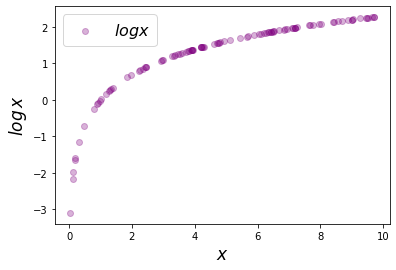

In [36]:
from random import randrange
from math import log
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline 

random = []
xlist = []
for i in range(100):
    x = np.random.uniform(0, 10) # choose number between 0 and 10 
    xlist.append(x) 
    random.append(math.log(x))
    
    
plt.scatter(xlist, random, c='purple',alpha=0.3,label=r'$log x$')
plt.ylabel(r'$log \, x$', fontsize=17)
plt.xlabel(r'$x$',fontsize=17)
plt.legend(fontsize=16)
plt.show()

**Odds ratio**, represents which group (male/female) has better odds of success, and it's given by calculating the ratio of odds for each group. Odds ratio for females = odds of successful purchase by female (0.5) / odds of successful purchase by male (0.53) ... (0.5 / 0.53) or **.93** for females and **1.06** for males.

# Linear to Logistic Regression 

# Logistic Function



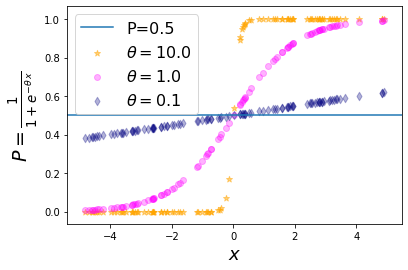

In [37]:
from math import exp

random1=[]
random2=[]
random3=[]
xlist = []
theta=[10, 1,0.1]

for i in range(100):
    x = np.random.uniform(-5,5)
    xlist.append(x)
    logreg1 = 1/(1+math.exp(-(theta[0]*x)))
    logreg2 = 1/(1+math.exp(-(theta[1]*x)))
    logreg3 = 1/(1+math.exp(-(theta[2]*x)))
    random1.append(logreg1)
    random2.append(logreg2)
    random3.append(logreg3)
    
    
plt.scatter(xlist, random1, marker='*',s=40, c='orange',alpha=0.5,label=r'$\theta = %3.1f$'%(theta[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$\theta = %3.1f$'%(theta[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$\theta = %3.1f$'%(theta[2]))

plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-\theta \, x}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=16)
plt.show()

From the plot above, notice that the higher the value of the coefficient (orange stars) of the independent variable (here x), better it can represent two distinct probabilities 0 and 1. 

For lower coefficients it's essentially a straight line, resembling a linear regression function.

# Bernoulli and Logit
The aim of logistic regression is to predict some unknown probability of *P* for a successful event, for any given linear combination of independent variables (i.e. features) 

How are Bernoulli and logit connected? The binomial distribution which is the probability distribution of having *n* success out of *N* trials, given that each trial is true with probability *P* and false with probability *Q= 1 - P*. 

Bernoulli distribution is a special case of binomial distribution for a single trial (*N = 1* ). **Most importantly we see that the dependent variable in logistic regression follows Bernoulli distribution having an unknown probability of P. Therefore, the logit i.e. log of odds, links the independent variable (*Xs*) to the Bernoulli distribution.** in logit case, P is unknown, but in Bernoulli distribution, we know it. 

# Example with Cancer Data-set and Probability Threshold 

Application of logistic regression. Here we'll focus on how we can set the probability threshold to classify our model. 

In [38]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

X_trainc, X_testc, y_trainc, y_testc = train_test_split(cancer.data, cancer.target, test_size=.3, stratify=cancer.target, random_state=30)

logreg = LogisticRegression()
logreg.fit(X_trainc, y_trainc)

print("LogReg score on cancer dataset: ", logreg.score(X_testc, y_testc))

LogReg score on cancer dataset:  0.9649122807017544


/Users/abrahamtunggala/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We will use `predict_proba` method for logistic regression which returns "probability estimates for all classes which are ordered by the label of classes"

In [46]:
proba = logreg.predict_proba(X_testc)

print(proba[1:10])

[[6.08328032e-02 9.39167197e-01]
 [7.19755180e-03 9.92802448e-01]
 [9.99948083e-01 5.19173769e-05]
 [5.75904440e-02 9.42409556e-01]
 [9.65235362e-01 3.47646383e-02]
 [3.18841040e-01 6.81158960e-01]
 [9.99655311e-01 3.44688699e-04]
 [8.34696844e-04 9.99165303e-01]
 [9.99998175e-01 1.82490975e-06]]


As our target is 0 or 1, `predict_proba` will give us a probability matrix of dimension (N,2). N is the number of instances, the first index refers to the probability that the data belong to class 0m and the second refers to the probability that the data belongs to class 1. By default, if the probability is more than 0.5, the the prediction is categorized as a positive outcome. Each row of the two columns should equal to 1, as a probability of success (*P*) and failure (*1 - P*) should be equal to 1. 

We can now use the `predict` method, which predicts class labels and default case for binary classification, it categorizes probabilities less than 0.5 as 0 and vice versa. 

In [48]:
predict = logreg.predict(X_testc)

print(predict)

[1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1]


Now we consider the first column of the `proba=logreg.predict_proba(X_testc)`, which consists of probabilities for class 0. We'll make a mini dataframe with this array. 

In [49]:
probability = proba[:,0]
prob_df = pd.DataFrame(probability)

prob_df.head()

,0
0,0.005428
1,0.060833
2,0.007198
3,0.999948
4,0.057590


In [50]:
# threshold of 1 or yes = 0.9
prob_df['predict'] = np.where(prob_df[0]>= 0.9, 1, 0)

In [51]:
prob_df.head(10)

,0,predict
0,0.005428,0
1,0.060833,0
2,0.007198,0
3,0.999948,1
4,0.057590,0
5,0.965235,1
6,0.318841,0
7,0.999655,1
8,0.000835,0
9,0.999998,1


In [60]:
prob_df['predict'] = np.where(prob_df[0]>=0.50, 1, 0)

len(prob_df[prob_df.predict == 1])


58

In [61]:
prob_df['predict'] = np.where(prob_df[0]>=0.97,1, 0)
len(prob_df[prob_df['predict']==1])


45